# Slot Machine Game
- Object: get more coin
- Episode: 1 Action
- State: (X)
- Action: Which arm do you choose?
- Reward: +1 if get coin
- Learning Method: epsilon-greedy, UCB1

In [1]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
class SlotArm():
    def __init__(self, probability):
        self.probability = probability
        
    def draw(self):
        if(self.probability > random.random()):
            return 1.0
        else:
            return 0.0
        
class EpsilonGreedy():
    def __init__(self, epsilon):
        self.epsilon = epsilon
        
    def initialize(self, n_arms):
        self.n_actions = np.zeros(n_arms) # the number of actions
        self.values = np.zeros(n_arms) # value of each arm
    
    def select_arm(self):
        if(self.epsilon > random.random()):
            # select arm randomly
            return np.random.randint(0, len(self.values))
        else:
            # select arm which has max value
            return np.argmax(self.values)
        
    def update(self, chosen_arm, reward, t):
        self.n_actions[chosen_arm] += 1
        
        n_actions = self.n_actions[chosen_arm]
        values = self.values[chosen_arm]
        
        self.values[chosen_arm] = ((n_actions-1)/float(n_actions)) * values + (1/float(n_actions)) * reward
        
    def label(self):
        return 'epsilon-greedy(' + str(self.epsilon) + ')'
    
    
class UCB1():
    def initialize(self, n_arms):
        self.n_actions = np.zeros(n_arms)
        self.n_success = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        
    def select_arm(self):
        for i in range(len(self.n_actions)):
            if(self.n_actions[i] == 0):
                return i
        return np.argmax(self.values)
    
    def update(self, chosen_arm, reward, t):
        self.n_actions[chosen_arm] += 1
        
        if(reward == 1.0):
            self.n_success[chosen_arm] += 1
            
        for i in range(len(self.n_actions)):
            if(self.n_actions[i] == 0):
                return
            
        for i in range(len(self.values)):
            self.values[i] = (self.n_success[i] / self.n_actions[i]) + ((2*math.log(t)/self.n_actions[i])**0.5)
            
    def label(self):
        return 'UCB1'

In [6]:
def play(algorithm, arms, n_simulations, n_times):
    times = np.zeros(n_simulations * n_times)
    rewards = np.zeros(n_simulations * n_times)
    
    for simulation in range(n_simulations):
        algorithm.initialize(len(arms))
        
        for time in range(n_times):
            index = simulation * n_times + time
            
            times[index] = time + 1
            chosen_arm = algorithm.select_arm()
            reward = arms[chosen_arm].draw()
            rewards[index] = reward
            
            algorithm.update(chosen_arm, reward, time+1)
    
    return [times, rewards]

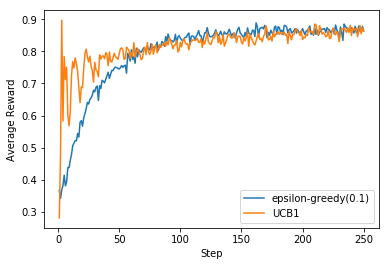

In [7]:
arms = (SlotArm(0.3), SlotArm(0.5), SlotArm(0.9))
algorithms = (EpsilonGreedy(0.1), UCB1())

for algo in algorithms:
    results = play(algo, arms, 1000, 250)
    
    df = pd.DataFrame({'times': results[0], 'rewards': results[1]})
    mean = df['rewards'].groupby(df['times']).mean()
    plt.plot(mean, label=algo.label())
    
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc='best')
plt.show()